# Ridge Regresion

Como adicional, se quiere realizar una comparacion entre ambos modelos de regresion. Para asi, poder ver sus diferencias y llegar a una conclusion. Si bien es otro metodo, la parte inicial es la misma que el anterior. El hecho del reordenamiento del dataset, como tambien de valores no nulos y en caso de nan reemplzarlo, sigue siendo viable para que nuestros modelos sean mas eficiente y no presente ningun tipo de error en el algoritmo.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv("categorías de corredores.csv", index_col=0)
df.head()

,place,gender,age,home,time,Velocidad
3475,3592,Male,52,GBR,217.483333,Regular
13594,13853,Female,40,NY,272.550000,Regular
12012,12256,Male,31,FRA,265.283333,Regular
10236,10457,Female,33,MI,256.150000,Regular
9476,9686,Male,33,NY,252.250000,Regular


In [3]:
df= df.sort_values("home")
#Deseo resetear los valores del index para que no queden mal
df= df.reset_index(drop=True)

In [4]:
del(df['place'])

In [5]:
df

,gender,age,home,time,Velocidad
0,Male,37,AK,147.333333,Veloz
1,Male,72,ARG,321.866667,Lento
2,Male,34,ARG,182.766667,Veloz
3,Male,33,ARG,211.700000,Regular
4,Male,38,AUS,230.750000,Regular
...,...,...,...,...,...
995,Male,50,WA,239.083333,Regular
996,Female,39,WA,201.350000,Regular
997,Male,49,WI,290.933333,Regular
998,Male,34,WI,279.050000,Regular


In [6]:
nulls = pd.isnull(df)
nulls = nulls.sum()
nulls = nulls[nulls > 0]

nulls

home    1
dtype: int64

In [7]:
df=df.fillna(method='ffill')

In [8]:
df.isnull().any()

gender       False
age          False
home         False
time         False
Velocidad    False
dtype: bool

Con el fin de trabajar con un dataframe el cual podramos modificar y no cambiar el original, se crea uno igual, el cual llamaremos df_aux. Esto debido a que los metodos que veamos a continuacion, no necesitan de proporcionales variables independientes o dependientes y transformarlas a un array.Ya que, todo este proceso se encarga los metodos

In [9]:
df_aux = df 
df_aux

,gender,age,home,time,Velocidad
0,Male,37,AK,147.333333,Veloz
1,Male,72,ARG,321.866667,Lento
2,Male,34,ARG,182.766667,Veloz
3,Male,33,ARG,211.700000,Regular
4,Male,38,AUS,230.750000,Regular
...,...,...,...,...,...
995,Male,50,WA,239.083333,Regular
996,Female,39,WA,201.350000,Regular
997,Male,49,WI,290.933333,Regular
998,Male,34,WI,279.050000,Regular


Luego con la funcion map transformaremos los valores de nuestro dataframe a unos valores eneteros 

In [10]:
df_aux['gender'] = df_aux['gender'].map({'Male': 1,'Female':0})
df_aux['Velocidad'] = df_aux['Velocidad'].map({'Veloz':2,'Regular':1,'Lento':0})

In [11]:
df_aux

,gender,age,home,time,Velocidad
0,1,37,AK,147.333333,2
1,1,72,ARG,321.866667,0
2,1,34,ARG,182.766667,2
3,1,33,ARG,211.700000,1
4,1,38,AUS,230.750000,1
...,...,...,...,...,...
995,1,50,WA,239.083333,1
996,0,39,WA,201.350000,1
997,1,49,WI,290.933333,1
998,1,34,WI,279.050000,1


Aca logramos importar los 3 metodos que utilizaremos, el cual proporcione los links de las paginas web con las que me informe para poder llevar a cabo esta parte

In [12]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

# Informacion de ridgeClassifier la cual me base para utilizar este metodo:https://www.mygreatlearning.com/blog/what-is-ridge-regression/
rr = RidgeClassifier(alpha=1)
#TimesSeriesSplit es similar a la división aleatoria, que consiste en validar la previsibilidad del modelo, independientemente de cómo se dividan
# los conjuntos de datos de prueba.
#Informacion la cual me base sacada de: https://medium.com/@Stan_DS/timeseries-split-with-sklearn-tips-8162c83612b9 
split = TimeSeriesSplit(n_splits=3)
#Informacion la cual me base  sacada de : https://analyticsindiamag.com/a-complete-guide-to-sequential-feature-selection/
#https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e
sfs=SequentialFeatureSelector(rr, n_features_to_select="auto",direction="backward", cv=split)

A traves de las siguientes lineas de codigo sacaremos aquellas columnas que nuestro dataframe aux no debe poseer para realizar el algoritmo. La columna home la cual no proporciona ningun tipo de modificacion en el algoritmo y la columna Velocidad que es aquella que intentamos predecir. Solo dejaremos seleccionadas las restantes las cual utilizaremos para nuestro algoritmo

In [13]:
removed_columns= ["home", "Velocidad"]
selected_columns= df_aux.columns[~df_aux.columns.isin(removed_columns)]

In [14]:
selected_columns

Index(['gender', 'age', 'time'], dtype='object')

In [15]:
df_aux

,gender,age,home,time,Velocidad
0,1,37,AK,147.333333,2
1,1,72,ARG,321.866667,0
2,1,34,ARG,182.766667,2
3,1,33,ARG,211.700000,1
4,1,38,AUS,230.750000,1
...,...,...,...,...,...
995,1,50,WA,239.083333,1
996,0,39,WA,201.350000,1
997,1,49,WI,290.933333,1
998,1,34,WI,279.050000,1


Luego se realiza la fase de "entrenamiento" de nuestro modelo con el metodo de regresion investigado, pasandole por parametro nuestras variables de entrenamiento, las columnas seleccionadas y por otro lado la columna a predecir

In [16]:
sfs.fit(df_aux[selected_columns], df_aux["Velocidad"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          direction='backward',
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select='auto')

Una vez hecho esto, utilizando la funcion get_support, nuestro metodo seleccionara de las columnas enviadas,las cuales seran de importancia para lograr una mayor efectividad a la hora de predecir y descartar aquellas que el algoritmo no necesita. Luego mostraremos por pantalla cuales fueron seleccionadas. Debido a que el metodo devuelve un true y un false de las columnas que el necesita, al enlistarlas nos mostrara solo las que necesita y estas utilizaremos 

In [17]:
predictors = list(selected_columns[sfs.get_support()])

In [18]:
predictors

['age', 'time']

Ahora pasaremos a crear una funcion la cual recibe por parametro nuestro dataframe aux, nuestro modelo y  el predictor, todas variables que se definieron al principio, en la explicacion de los metodos. Todas las predicciones que vayamos realizando, una por una, la guardaremos en la variable all_predictions. La cual luego combinaremos en un dataframe aparte junto con los datos "reales" de la columna "Velocidad" de nuestro dataframe para poder mostrarlos por pantalla. En el codigo siguiente podremos observar un ciclo for el cual recorrera todo el dataframe, basandose en la columna "age" hasta que logre llegar al final (por eso el rango esta definido por len(age)), esto con el objetivo de usar los primeros 10 datos (por eso la variable start en 10), como datos de entrenamiento y luego predecir el siguiente, luego en el proximo ciclo utilizara como entrenamiento los primeros 10 de entrenamiento y el que acabamos de predecir, para predecir el siguiente y asi sucesivamente hasta terminar todos los datos.Como retorno, enviara un dataframe con todos los datos recolectados

In [20]:
def backtest (data, model ,predictors, start=10, step=1):
    all_predictions = []

    age= sorted(data["age"].unique())
    for i in range(start, len(age), step):

        train = data[data["age"] < age[i]]
        test = data[data["age"] == age[i]]

        model.fit(train[predictors], train["Velocidad"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index = test.index)

        #Crearemos un dataframe nuevo el cual llamare combined y voy a usar la funcion concatenar de pandas, el cual coloca
        #dos series o dataframe juntos , los valores actuales (los que estan en nuestro dataframe) y nuestra predicciones.    
        
        combined = pd.concat([test["Velocidad"], preds] , axis=1)
        combined.columns = ["actual data","prediction"]

        all_predictions.append(combined)
    
    return pd.concat(all_predictions)   

En el codigo a continuacion utilizaremos la funcion explicada anteriormente pasado por parametro las variables que observamos a continuacion

In [21]:
predictions = backtest(df_aux, rr, predictors)

In [22]:
predictions

,actual data,prediction
17,1,1
267,1,1
309,1,1
347,1,1
362,1,1
...,...,...
342,1,1
555,0,0
805,0,0
797,0,0


Como manera para medir la efectividad de nuestro algoritmo se  importa la funcion accuracy_Score. La cual logra mostrar que posee un valor muy alto de efectividad en la prediccion

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions["actual data"], predictions["prediction"])

0.854586129753915

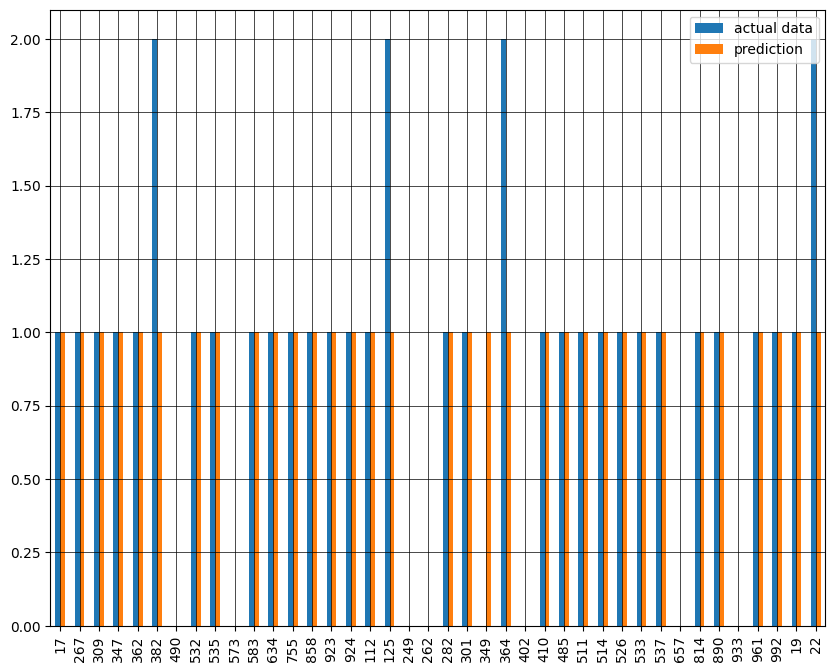

In [30]:
predictions.head(40).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Como podemos observar el metodo trabaja muy bien y es altamente efectivo el 85% logra predecir con de manera satisfactoria. Lo que si se puede observar con detenimiento que no predice muy bien los valores max como en este caso el dos que significa que la persona es "veloz" 